***
# Fair-Universe Public Data
***

# Import from Github

In [1]:
# !git clone https://github.com/ihsaan-ullah/fair-universe
# %cd fair-universe/starting_kit

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

## Directories

In [3]:
model_dir = 'sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

### Add directories to path

In [4]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)

***
# 1 - Import Data
***

In [5]:
from ingestion_program.data_io import load_data, show_data_statistics, write

In [8]:
data_name = 'fair_universe_challenge'
data_dir = 'sample_data' 

In [9]:
train_sets, test_sets, settings = load_data(data_dir, load_settings=True)



###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  sample_data
[*] train data dir :  sample_data\train\data
[*] train labels dir :  sample_data\train\labels
[*] test data dir :  sample_data\test\data
[*] test labels dir :  sample_data\test\labels
[*] settings dir :  sample_data\settings
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] settings dir found
[+] 6 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------




### Data Statistics

In [10]:
show_data_statistics(train_sets, name="Train")

###-------------------------------------###
### Data Statistics Train
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


In [11]:
show_data_statistics(test_sets, name="Test")

###-------------------------------------###
### Data Statistics Test
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


***
# 2 - Data Augmentation
***

In [12]:
from ingestion_program.augment_data import get_augmented_data

augmented_sets = []
for i, _ in enumerate(train_sets):
    augmented_set = get_augmented_data(train_sets[i],  test_sets[i])
    augmented_sets.append(augmented_set)

***
# 3 - Preprocessing
***

In [ ]:
train_sets_preprocessed, test_sets_preprocessed = [], []
for train_set, test_set in zip(train_sets, test_sets):
    
    train_mean = np.mean(train_set["data"]).values
    test_mean = np.mean(test_set["data"]).values

    translation = test_mean - train_mean

    train_sets_preprocessed.append({
        "data" : train_set["data"] - translation, 
        "labels" : train_set["labels"] 
    })

    test_sets_preprocessed.append({
        "data" : test_set["data"] - translation, 
        "labels" : test_set["labels"] 
    })


***
# 4 - Baselines
***

In this section, we introduce the following baselines:

1. Constant model
2. NB plain
3. NB preprocessing
4. LDA plain
5. RR plain
6. NB data augmentation
7. LDA data augmentation
8. RR data augmentatio

**Import Model and Scoring function**

In [ ]:
from model import Model
from metric import auc_metric, bac_metric

**Model Names and settings**

In [ ]:
model_settings = [
    {"display_name" : "constant model", "model_name": "Constant", "preprocessing" : False, "preprocessing_method" : "translation",  "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NB plain", "model_name": "NB", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NB preprocessing", "model_name": "NB", "preprocessing" : True, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "LDA plain", "model_name": "LDA", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "RR plain", "model_name": "RR", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NB data augmentation", "model_name": "NB", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"},
    {"display_name" : "LDA data augmentation", "model_name": "LDA", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"},
    {"display_name" : "RR data augmentation", "model_name": "RR", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"}
]

**Train and Test**  

- Load Data
- Train Model
- Get Predictions
- Get Score
- Get Metric Scores
- Save Predictions
- Save Scores


In [ ]:
#---------------------------------
# Load Data
#---------------------------------
# Train set
X_Trains = [train_set["data"] for train_set in train_sets]
Y_Trains = [train_set["labels"] for train_set in train_sets]

# Test set
X_Tests = [test_set["data"] for test_set in test_sets]
Y_Tests = [test_set["labels"] for test_set in test_sets]


print("############################################")
print("### Training Program")
print("############################################")

#---------------------------------
# Loop over model settings
#---------------------------------
results = []
for model_setting in model_settings:

    print("\n--------------------------------------------")
    print("[*] Model : {} --- Preprocessing: {} --- Data Augmentation: {}".format(model_setting["model_name"], model_setting["preprocessing"], model_setting["data_augmentation"]))
    print("--------------------------------------------")
    #---------------------------------
    # Predictions Directory
    #---------------------------------
    # result directory 
    predictions_dir = os.path.join(result_dir, model_setting["model_name"])
    # create result directory if not created
    if not os.path.exists(predictions_dir):
        os.mkdir(predictions_dir) 

    #---------------------------------
    # Loop over datasets
    #---------------------------------
    trained_models = []
    Y_hat_trains, Y_hat_score_trains = [], []
    Y_hat_tests, Y_hat_score_tests = [], []
    auc_trains, auc_tests, bac_trains, bac_tests = [],[],[],[]
    for index, _ in enumerate(X_Trains):

        print("\n\tDataset : {}".format(index+1))
        print("\t----------------")

        
       
        # model_name 
        trained_model_name = model_dir + model_setting["model_name"]

        #---------------------------------
        # Load Model
        #---------------------------------
        print("\t[*] Loading Model")
        model = Model(
            model_setting["model_name"],
            X_Trains[index],
            Y_Trains[index],
            X_Tests[index],
            model_setting["preprocessing"],
            model_setting["preprocessing_method"],
            model_setting["data_augmentation"],
            model_setting["data_augmentation_type"]
        )
        # Load Trained Model 
        # model = model.load(trained_model_name) 

        #---------------------------------
        # Train Model
        #---------------------------------
        # Train model if not trained
        print("\t[*] Training Model")
        if not(model.is_trained):
            model.fit() 

        #---------------------------------
        # Get Predictions
        #---------------------------------
        print("\t[*] Get Predictions")
        Y_hat_trains.append(model.predict(X_Trains[index]))
        Y_hat_tests.append(model.predict())
        
        #---------------------------------
        # Get Scores/Proba
        #---------------------------------
        print("\t[*] Get Scores")
        Y_hat_score_trains.append(model.decision_function(X_Trains[index]))
        Y_hat_score_tests.append(model.decision_function())

        trained_models.append(model)

        #---------------------------------
        # Get Metric Scores
        #---------------------------------
        print("\t[*] Computing Scores using AUC and BAC")
        auc_trains.append(round(auc_metric(Y_Trains[index], Y_hat_score_trains[-1]), 2))
        auc_tests.append(round(auc_metric(Y_Tests[index], Y_hat_score_tests[-1]), 2))
        bac_trains.append(round(bac_metric(Y_Trains[index], Y_hat_trains[-1]), 2))
        bac_tests.append(round(bac_metric(Y_Tests[index], Y_hat_tests[-1]), 2))


        #---------------------------------
        # Save Predictions
        #---------------------------------
        print("\t[*] Saving Predictions and Scores")
        # prediction file name
        prediction_name_train = os.path.join(predictions_dir, "train_"+ str(index+1) + ".predictions")
        prediction_name_test = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

        # score file name
        score_name_train = os.path.join(predictions_dir, "train_"+ str(index+1) + ".scores")
        score_name_test = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
        
        # save prediction
        write(prediction_name_train, Y_hat_score_trains[-1])
        write(prediction_name_test, Y_hat_score_tests[-1])

        # save score
        write(score_name_train, Y_hat_score_trains[-1])
        write(score_name_test, Y_hat_score_tests[-1])
    


    
    train_auc_err = round(np.std(auc_trains)/np.sqrt(len(auc_trains)), 2)
    test_auc_err = round(np.std(auc_tests)/np.sqrt(len(auc_tests)), 2)
    train_bac_err = round(np.std(bac_trains)/np.sqrt(len(bac_trains)), 2)
    test_bac_err = round(np.std(bac_tests)/np.sqrt(len(bac_tests)), 2)
    train_auc_mean = round(np.mean(auc_trains), 2)
    test_auc_mean = round(np.mean(auc_tests), 2)
    train_bac_mean = round(np.mean(bac_trains), 2)
    test_bac_mean = round(np.mean(bac_tests), 2)

    results.append({
        "trained_models" : trained_models,
        "Y_hat_trains" : Y_hat_trains,
        "Y_hat_tests" : Y_hat_tests,
        "Y_hat_score_trains" : Y_hat_score_trains,
        "Y_hat_score_tests" : Y_hat_score_tests,
        "auc_trains" : auc_trains,
        "auc_tests" : auc_tests,
        "bac_trains" : bac_trains,
        "bac_tests" : bac_tests,
        "train_auc_err" : train_auc_err,
        "test_auc_err" : test_auc_err,
        "train_bac_err" : train_bac_err,
        "test_bac_err" : test_bac_err,
        "train_auc_mean" : train_auc_mean,
        "test_auc_mean" : test_auc_mean,
        "train_bac_mean" : train_bac_mean,
        "test_bac_mean" : test_bac_mean

    })

############################################
### Training Program
############################################

--------------------------------------------
[*] Model : Constant --- Preprocessing: False --- Data Augmentation: False
--------------------------------------------

	Dataset : 1
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 2
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 3
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 4
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions an

***
# 6 - Scoring
***

In [ ]:
train_columns = ["train_set {}".format(i) for i in range(1,17)]
train_columns.extend(["avg", "std_err"])
test_columns = ["test_set {}".format(i) for i in range(1,17)]
test_columns.extend(["avg", "std_err"])


train_aucs, test_aucs, train_bacs, test_bacs, indexes = [],[],[],[],[]
for model_s, result in zip(model_settings, results):
    indexes.append(model_s["display_name"])

    train_aucs.append(copy(result["auc_trains"]))
    train_aucs[-1].extend([result["train_auc_mean"], result["train_auc_err"]])
    test_aucs.append(copy(result["auc_tests"]))
    test_aucs[-1].extend([result["test_auc_mean"], result["test_auc_err"]])
    train_bacs.append(copy(result["bac_trains"]))
    train_bacs[-1].extend([result["train_bac_mean"], result["train_bac_err"]])
    test_bacs.append(copy(result["bac_tests"]))
    test_bacs[-1].extend([result["test_bac_mean"], result["test_bac_err"]])



score_auc_df_train = pd.DataFrame(data=train_aucs, columns=train_columns, index=indexes)
score_auc_df_test = pd.DataFrame(data=test_aucs, columns=test_columns, index=indexes)
score_bac_df_train = pd.DataFrame(data=train_bacs, columns=train_columns, index=indexes)
score_bac_df_test = pd.DataFrame(data=test_bacs, columns=test_columns, index=indexes)


score_auc_df_train.to_csv("scoring_output/auc_train.csv")
score_auc_df_test.to_csv("scoring_output/auc_test.csv")
score_bac_df_train.to_csv("scoring_output/bac_train.csv")
score_bac_df_test.to_csv("scoring_output/bac_test.csv")




In [ ]:
score_auc_df_train

,train_set 1,train_set 2,train_set 3,train_set 4,train_set 5,train_set 6,train_set 7,train_set 8,train_set 9,train_set 10,train_set 11,train_set 12,train_set 13,train_set 14,train_set 15,train_set 16,avg,std_err
constant model,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
NB plain,1.00,1.00,0.72,0.77,1.00,1.00,0.99,0.99,0.99,1.00,0.74,0.74,1.00,1.00,0.98,0.99,0.93,0.03
NB preprocessing,0.50,0.54,0.47,0.52,0.55,0.47,0.54,0.52,0.53,0.51,0.49,0.52,0.49,0.48,0.52,0.48,0.51,0.01
LDA plain,0.82,0.84,0.71,0.77,1.00,1.00,0.99,0.99,0.81,0.83,0.74,0.73,1.00,1.00,0.98,0.99,0.89,0.03
RR plain,0.82,0.84,0.71,0.77,1.00,1.00,0.99,0.99,0.81,0.83,0.74,0.73,1.00,1.00,0.98,0.99,0.89,0.03
NB data augmentation,0.99,0.95,0.70,0.73,1.00,1.00,0.99,0.99,0.98,0.89,0.73,0.65,1.00,1.00,0.98,0.98,0.91,0.03
LDA data augmentation,0.82,0.77,0.67,0.73,1.00,0.96,0.99,0.99,0.81,0.77,0.67,0.66,0.95,0.83,0.98,0.98,0.85,0.03
RR data augmentation,0.82,0.77,0.67,0.73,1.00,0.93,0.99,0.99,0.81,0.77,0.67,0.66,0.95,0.82,0.98,0.98,0.85,0.03


In [ ]:
score_auc_df_test

,test_set 1,test_set 2,test_set 3,test_set 4,test_set 5,test_set 6,test_set 7,test_set 8,test_set 9,test_set 10,test_set 11,test_set 12,test_set 13,test_set 14,test_set 15,test_set 16,avg,std_err
constant model,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
NB plain,1.00,0.32,0.19,0.86,0.78,0.21,0.66,0.83,0.63,0.39,0.72,0.73,0.65,0.29,0.74,0.68,0.60,0.06
NB preprocessing,0.99,0.85,0.78,0.82,0.78,0.88,0.77,0.85,0.52,0.53,0.72,0.67,0.61,0.67,0.74,0.68,0.74,0.03
LDA plain,0.84,0.76,0.84,0.82,0.76,0.84,0.76,0.84,0.77,0.72,0.72,0.69,0.68,0.73,0.73,0.68,0.76,0.01
RR plain,0.84,0.76,0.84,0.82,0.76,0.84,0.76,0.84,0.77,0.72,0.72,0.69,0.68,0.73,0.73,0.68,0.76,0.01
NB data augmentation,1.00,0.58,0.85,0.86,0.80,0.83,0.77,0.84,0.48,0.52,0.71,0.81,0.43,0.73,0.74,0.64,0.72,0.04
LDA data augmentation,0.84,0.50,0.75,0.86,0.75,0.71,0.73,0.84,0.76,0.60,0.69,0.81,0.75,0.61,0.76,0.66,0.73,0.02
RR data augmentation,0.84,0.50,0.75,0.86,0.75,0.68,0.73,0.84,0.76,0.60,0.69,0.81,0.75,0.61,0.76,0.66,0.72,0.02


In [ ]:
score_bac_df_train

,train_set 1,train_set 2,train_set 3,train_set 4,train_set 5,train_set 6,train_set 7,train_set 8,train_set 9,train_set 10,train_set 11,train_set 12,train_set 13,train_set 14,train_set 15,train_set 16,avg,std_err
constant model,0.50,0.50,0.5,0.5,0.5,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
NB plain,0.94,0.96,0.5,0.5,1.0,1.0,0.90,0.89,0.98,0.98,0.67,0.66,1.00,1.00,0.93,0.94,0.87,0.04
NB preprocessing,0.52,0.51,0.5,0.5,0.5,0.5,0.51,0.52,0.50,0.50,0.49,0.51,0.50,0.49,0.51,0.49,0.50,0.00
LDA plain,0.50,0.50,0.5,0.5,1.0,1.0,0.90,0.87,0.84,0.84,0.67,0.66,0.96,0.97,0.93,0.94,0.79,0.05
RR plain,0.50,0.50,0.5,0.5,0.5,0.5,0.53,0.51,0.84,0.84,0.67,0.66,0.96,0.97,0.93,0.94,0.68,0.05
NB data augmentation,0.96,0.50,0.5,0.5,1.0,0.5,0.59,0.50,0.93,0.78,0.55,0.61,0.90,0.93,0.93,0.90,0.72,0.05
LDA data augmentation,0.50,0.50,0.5,0.5,1.0,0.5,0.90,0.87,0.84,0.82,0.63,0.62,0.89,0.85,0.93,0.94,0.74,0.05
RR data augmentation,0.50,0.50,0.5,0.5,0.5,0.5,0.53,0.51,0.84,0.82,0.63,0.62,0.89,0.84,0.93,0.94,0.66,0.04


In [ ]:
score_bac_df_test

,test_set 1,test_set 2,test_set 3,test_set 4,test_set 5,test_set 6,test_set 7,test_set 8,test_set 9,test_set 10,test_set 11,test_set 12,test_set 13,test_set 14,test_set 15,test_set 16,avg,std_err
constant model,0.50,0.50,0.50,0.50,0.5,0.50,0.50,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
NB plain,0.92,0.50,0.45,0.47,0.5,0.49,0.50,0.5,0.51,0.50,0.50,0.50,0.51,0.51,0.69,0.57,0.54,0.03
NB preprocessing,0.89,0.49,0.50,0.50,0.5,0.50,0.49,0.5,0.49,0.51,0.65,0.58,0.50,0.51,0.68,0.62,0.56,0.03
LDA plain,0.50,0.72,0.46,0.86,0.5,0.50,0.48,0.5,0.68,0.50,0.50,0.50,0.55,0.50,0.65,0.57,0.56,0.03
RR plain,0.50,0.50,0.50,0.50,0.5,0.64,0.50,0.5,0.68,0.50,0.50,0.50,0.55,0.50,0.65,0.57,0.54,0.02
NB data augmentation,0.97,0.50,0.50,0.50,0.5,0.50,0.50,0.5,0.50,0.52,0.50,0.72,0.47,0.50,0.67,0.56,0.56,0.03
LDA data augmentation,0.50,0.50,0.50,0.50,0.5,0.50,0.49,0.5,0.67,0.58,0.64,0.71,0.67,0.56,0.70,0.61,0.57,0.02
RR data augmentation,0.50,0.50,0.50,0.50,0.5,0.50,0.50,0.5,0.68,0.58,0.64,0.70,0.68,0.56,0.70,0.62,0.57,0.02


In [ ]:
from visualize import visualize_score

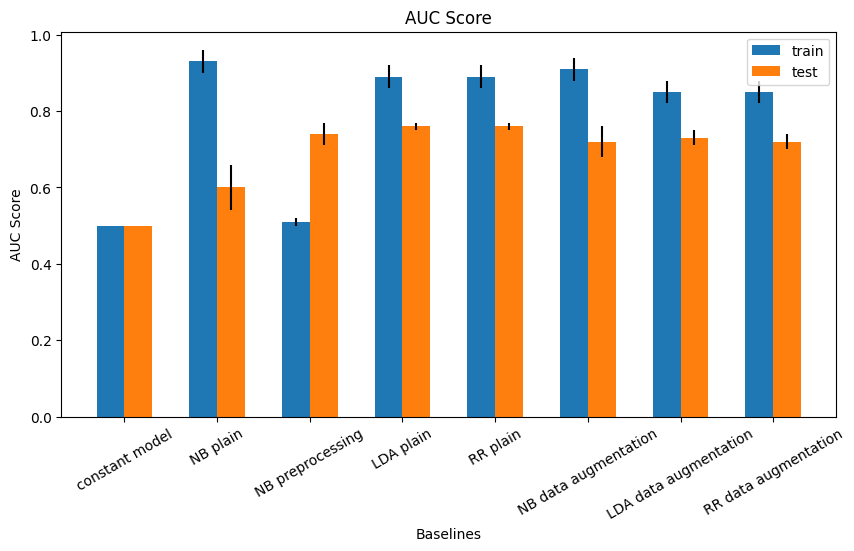

In [ ]:
visualize_score(score_auc_df_train, score_auc_df_test, "AUC Score")

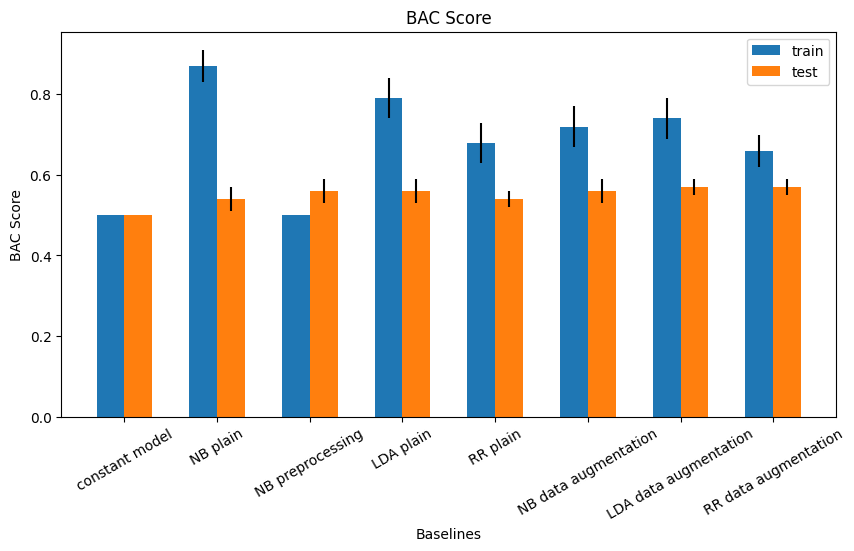

In [ ]:
visualize_score(score_bac_df_train, score_bac_df_test, "BAC Score")

***
# 7 - Submissions
***

### Unit Testing 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

**Test Ingestion Program**

In [ ]:
!python3 $problem_dir/ingestion.py

**Test Scoring Program**

In [ ]:
!python3 $score_dir/score.py

### Prepare the submission

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'code_submission_' + the_date + '.zip'
# sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(code_submission, model_dir)
# zipdir(sample_result_submission, result_dir)
print("Submit : " + code_submission + " to the compeition: https://www.codabench.org/competitions/674/")

Sample Code Submission is generated in the directory: `fair-universe/starting_kit/`